# **NORTH AMERICAN [SALARY TRENDS IN DATA RELATED CAREERS](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data)**

In [1]:
# Import required python packages
%matplotlib inline 
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# print('Matplotlib version: ', mpl.__version__)
# print(plt.style.available)
mpl.style.use(['tableau-colorblind10'])

# **DATA CLEANING**

In [2]:
df = pd.read_csv("/kaggle/input/jobs-in-data/jobs_in_data.csv")
df = pd.DataFrame(df, dtype=object)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   object
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   object
 5   salary_in_usd       9355 non-null   object
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: object(12)
memory usage: 877.2+ KB


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [3]:
# filter company and employee locations to US only
req = 'United States'
US_data = df[df['company_location'] == req]
US_data = US_data[US_data['employee_residence'] == req]
US_data.drop(columns={'company_size','salary_currency','salary_in_usd'
                      , 'employee_residence', 'company_location'}, inplace=True)
US_data.rename(columns={'work_year':'year'}, inplace=True)
US_data['salary'] = US_data['salary'].astype(int)
US_data.info()
US_data

<class 'pandas.core.frame.DataFrame'>
Index: 8080 entries, 1 to 9354
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              8080 non-null   object
 1   job_title         8080 non-null   object
 2   job_category      8080 non-null   object
 3   salary            8080 non-null   int64 
 4   experience_level  8080 non-null   object
 5   employment_type   8080 non-null   object
 6   work_setting      8080 non-null   object
dtypes: int64(1), object(6)
memory usage: 505.0+ KB


,year,job_title,job_category,salary,experience_level,employment_type,work_setting
1,2023,Data Architect,Data Architecture and Modeling,186000,Senior,Full-time,In-person
2,2023,Data Architect,Data Architecture and Modeling,81800,Senior,Full-time,In-person
3,2023,Data Scientist,Data Science and Research,212000,Senior,Full-time,In-person
4,2023,Data Scientist,Data Science and Research,93300,Senior,Full-time,In-person
5,2023,Data Scientist,Data Science and Research,130000,Senior,Full-time,Remote
...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,165000,Senior,Full-time,Remote
9351,2020,Data Scientist,Data Science and Research,412000,Senior,Full-time,Remote
9352,2021,Principal Data Scientist,Data Science and Research,151000,Mid-level,Full-time,Remote
9353,2020,Data Scientist,Data Science and Research,105000,Entry-level,Full-time,Remote


# **EXPLORATORY DATA ANALYSIS**

In [4]:
for i in US_data.columns:
    print('--'*44)
    print(i)
    print(US_data[i].unique())
US_data.nunique()

----------------------------------------------------------------------------------------
year
[2023 2021 2020 2022]
----------------------------------------------------------------------------------------
job_title
['Data Architect' 'Data Scientist' 'Machine Learning Researcher'
 'Data Engineer' 'Machine Learning Engineer' 'Data Analyst'
 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Product Manager'
 'Machine Learning Scientist' 'AI Engineer' 'MLOps Engineer'
 'Data Modeler' 'Data Science Consultant' 'Business Intelligence Analyst'
 'Data Manager' 'ML Engineer' 'Data Science Director' 'Head of Data'
 'BI Analyst' 'Data Management Analyst' 'Machine Learning Modeler'
 'Data Specialist' 'Data Integration Engineer'
 'Business Intelligence Manager' 'Data Integration Specialist'
 'Data Science Practitioner' 'Business Intelligence Developer' 'Data Lead'
 'Dat

year                   4
job_title            101
job_category          10
salary              1360
experience_level       4
employment_type        3
work_setting           3
dtype: int64

In [5]:
US_rec_counts = US_data['year'].value_counts()
US_rec_counts

year
2023    6642
2022    1323
2021      87
2020      28
Name: count, dtype: int64

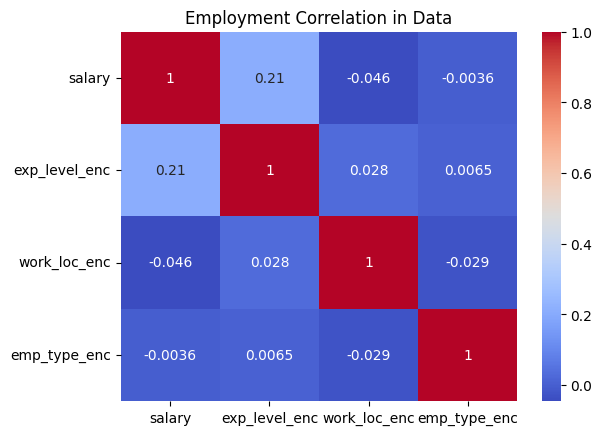

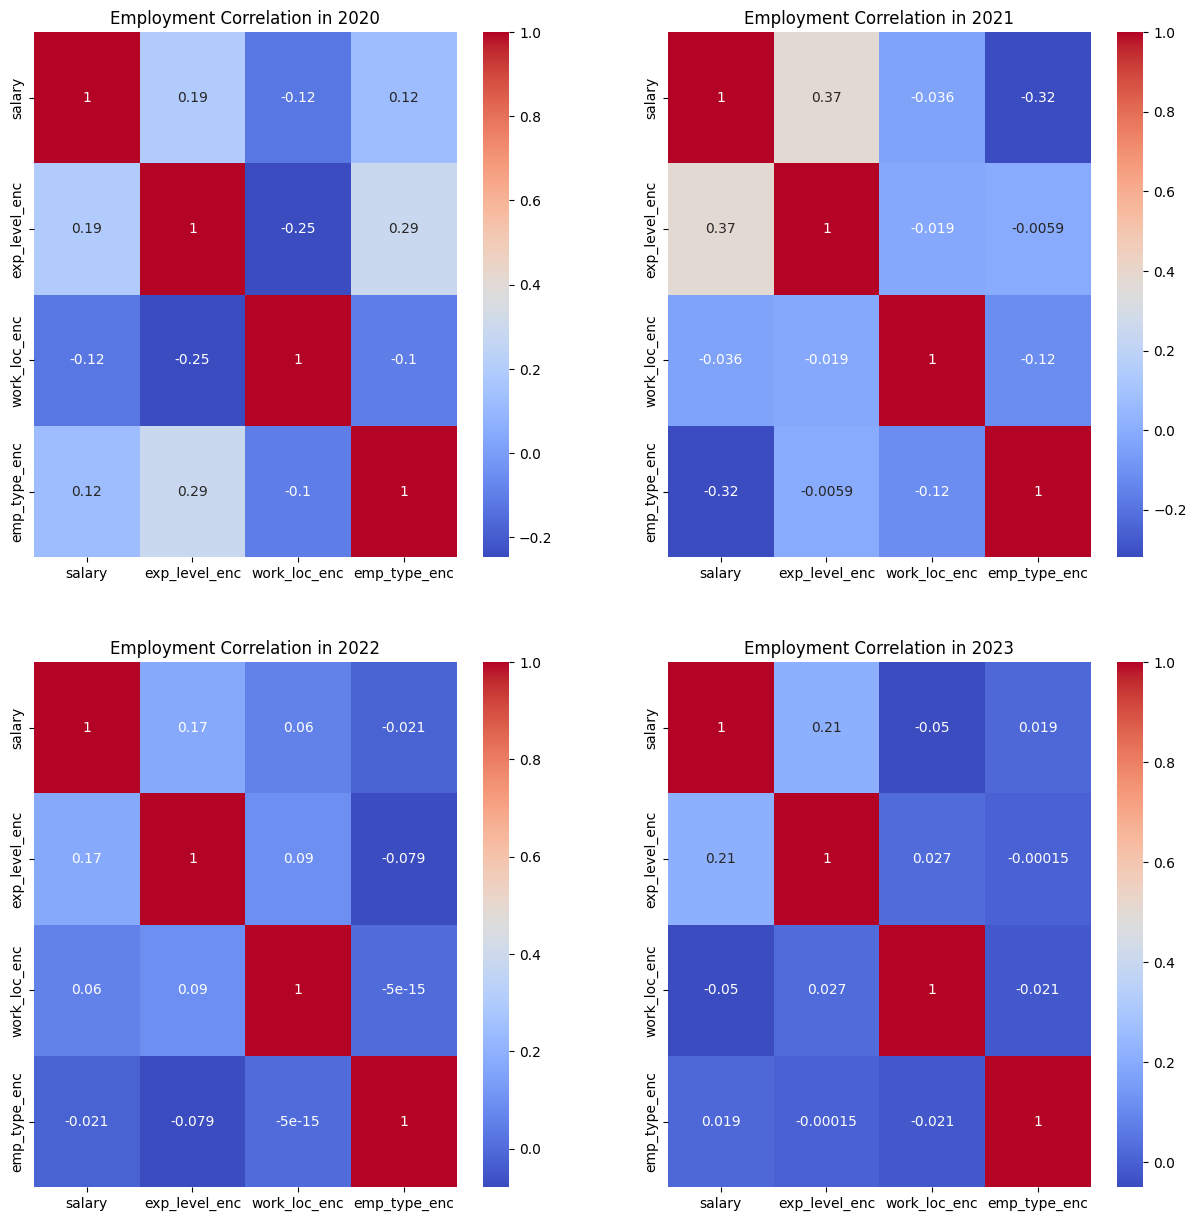

In [6]:
label_encoder = LabelEncoder()
US_data['exp_level_enc'] = label_encoder.fit_transform(US_data['experience_level'])
US_data['work_loc_enc'] = label_encoder.fit_transform(US_data['work_setting'])
US_data['emp_type_enc'] = label_encoder.fit_transform(US_data['employment_type'])

corr_matrix = US_data[['salary', 'exp_level_enc', 'work_loc_enc', 'emp_type_enc']].corr()
plt.title('Employment Correlation in Data')
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm')
plt.show()

plt.figure(figsize=(15,15))

plt.subplot(221)
year1 = US_data[US_data['year']==2020]
corr_matrix = year1[['salary', 'exp_level_enc', 'work_loc_enc', 'emp_type_enc']].corr()
plt.title('Employment Correlation in 2020')
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm')

plt.subplot(222)
year2 = US_data[US_data['year']==2021]
corr_matrix = year2[['salary', 'exp_level_enc', 'work_loc_enc', 'emp_type_enc']].corr()
plt.title('Employment Correlation in 2021')
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm')

plt.subplot(223)
year3 = US_data[US_data['year']==2022]
corr_matrix = year3[['salary', 'exp_level_enc', 'work_loc_enc', 'emp_type_enc']].corr()
plt.title('Employment Correlation in 2022')
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm')

plt.subplot(224)
year4 = US_data[US_data['year']==2023]
corr_matrix = year4[['salary', 'exp_level_enc', 'work_loc_enc', 'emp_type_enc']].corr()
plt.title('Employment Correlation in 2023')
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm')

plt.show()

In [7]:
stats = US_data.describe()
stats

,salary,exp_level_enc,work_loc_enc,emp_type_enc
count,8080.000000,8080.000000,8080.000000,8080.000000
mean,158598.940223,2.648515,1.350866,0.999134
std,59228.911481,0.728853,0.487026,0.040104
min,24000.000000,0.000000,0.000000,0.000000
25%,117875.000000,3.000000,1.000000,1.000000
50%,150000.000000,3.000000,1.000000,1.000000
75%,192000.000000,3.000000,2.000000,1.000000
max,450000.000000,3.000000,2.000000,2.000000


In [8]:
y1_stats = year1.describe()
y1_stats

,salary,exp_level_enc,work_loc_enc,emp_type_enc
count,28.000000,28.000000,28.000000,28.000000
mean,160555.357143,1.678571,1.607143,0.964286
std,99650.709740,1.123934,0.737327,0.188982
min,70000.000000,0.000000,0.000000,0.000000
25%,99500.000000,0.750000,1.750000,1.000000
50%,119000.000000,2.000000,2.000000,1.000000
75%,188500.000000,2.250000,2.000000,1.000000
max,450000.000000,3.000000,2.000000,1.000000


In [9]:
y2_stats = year2.describe()
y2_stats

,salary,exp_level_enc,work_loc_enc,emp_type_enc
count,87.000000,87.000000,87.000000,87.000000
mean,147206.034483,1.965517,1.551724,0.965517
std,69393.337087,1.104413,0.727510,0.183523
min,50000.000000,0.000000,0.000000,0.000000
25%,96575.000000,2.000000,1.000000,1.000000
50%,140000.000000,2.000000,2.000000,1.000000
75%,182500.000000,3.000000,2.000000,1.000000
max,423000.000000,3.000000,2.000000,1.000000


In [10]:
y3_stats = year3.describe()
y3_stats

,salary,exp_level_enc,work_loc_enc,emp_type_enc
count,1323.000000,1323.000000,1323.000000,1323.000000
mean,148294.352230,2.660620,1.526833,1.000000
std,50922.812594,0.738307,0.520239,0.038895
min,24000.000000,0.000000,0.000000,0.000000
25%,114450.000000,3.000000,1.000000,1.000000
50%,142127.000000,3.000000,2.000000,1.000000
75%,180000.000000,3.000000,2.000000,1.000000
max,405000.000000,3.000000,2.000000,2.000000


In [11]:
y4_stats = year4.describe()
y4_stats

,salary,exp_level_enc,work_loc_enc,emp_type_enc
count,6642.000000,6642.000000,6642.000000,6642.000000
mean,160792.462210,2.659139,1.312105,0.999548
std,60175.222882,0.711754,0.465980,0.032463
min,24000.000000,0.000000,0.000000,0.000000
25%,120000.000000,3.000000,1.000000,1.000000
50%,151600.000000,3.000000,1.000000,1.000000
75%,198200.000000,3.000000,2.000000,1.000000
max,405000.000000,3.000000,2.000000,2.000000


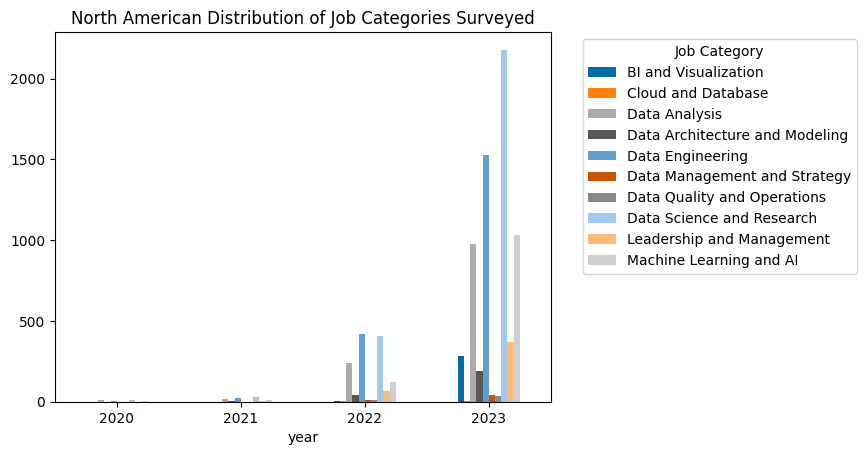

In [12]:
jcat2 = US_data.groupby(['year'])['job_category'].value_counts().unstack().fillna(0)

ax = jcat2.plot.bar(title='North American Distribution of Job Categories Surveyed')
plt.legend(title='Job Category', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

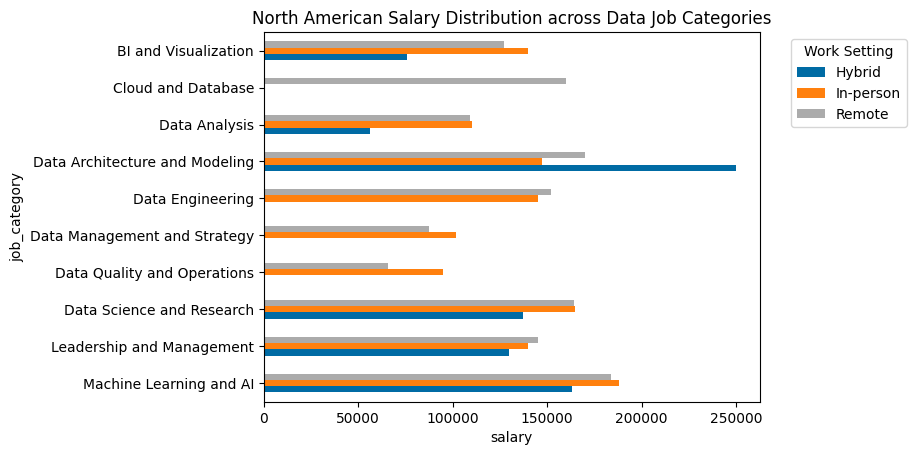

In [13]:
jcat = US_data.groupby(['job_category', 'work_setting'])['salary'].median().unstack().fillna(0).sort_index(
    ascending=False)

jcat.plot.barh(title='North American Salary Distribution across Data Job Categories', legend=True)
plt.legend(title='Work Setting', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('salary')
plt.show()

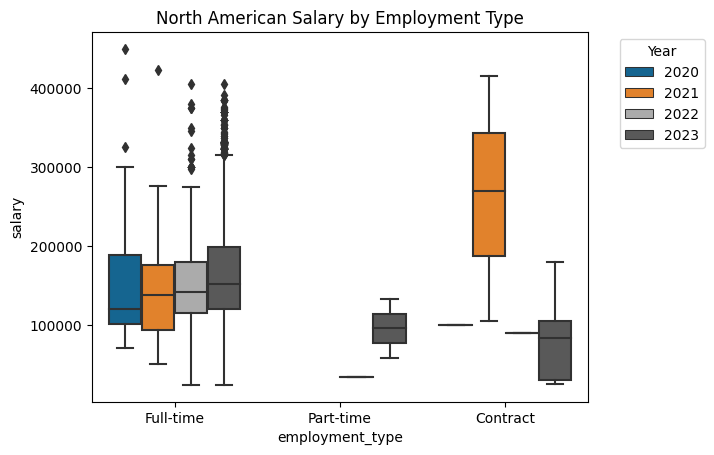

In [14]:
sns.boxplot(data=US_data, x='employment_type', y='salary',hue='year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('North American Salary by Employment Type')
plt.show()

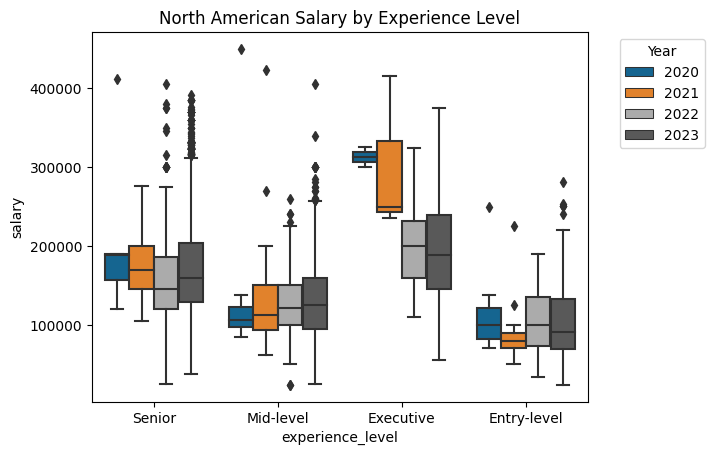

In [15]:
sns.boxplot(data=US_data, x='experience_level', y='salary', hue='year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('North American Salary by Experience Level')
plt.show()

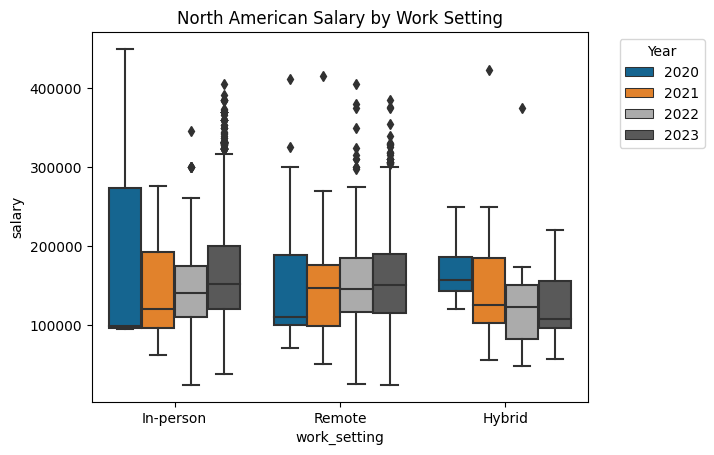

In [16]:
sns.boxplot(data=US_data, x='work_setting', y='salary', hue='year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('North American Salary by Work Setting')
plt.show()

# **FINDINGS**

In [17]:
years = sorted(US_data['year'].unique())
x = int(US_data['year'].value_counts().describe()[0])
y = set(US_data['job_category'])
UScount = int(stats.iloc[0,0])
m = "{:,.2f}".format(US_data['salary'].median())
medianpaypercentage = "{:,.2f}".format((US_data[US_data['salary']==US_data['salary'].median()].count()[0] / UScount)* 100)
maxpay = US_data[US_data['salary']==stats.iloc[-1,0]]
minpay = US_data[US_data['salary']==stats.iloc[3,0]]

In [18]:
print(
f'\t This assessment contains {x} years of salary details for Data related \
careers in North America starting in {years[0]}. \
There is a total of {"{:,}".format(UScount)} records in the dataset; \
{"{:,}".format(int(y1_stats.iloc[0,0]))} in {years[0]}, \
{"{:,}".format(int(y2_stats.iloc[0,0]))} in {years[1]}, \
{"{:,}".format(int(y3_stats.iloc[0,0]))} in {years[2]}, \
and {"{:,}".format(int(y4_stats.iloc[0,0]))} in {years[3]}. \
The Data job categories reported include {y}. \
The maximum salary reported within these catogories over the {x} year period is \
{"{:,.2f}".format(stats.iloc[-1,0])} for a {maxpay.iloc[0,4]} {maxpay.iloc[0,1]}, \
the minimum salary reported is {"{:,.2f}".format(stats.iloc[3,0])} for a {minpay.iloc[0,4]} \
{minpay.iloc[0,1]}, and the median salary is {m} within which \
{medianpaypercentage}% of the total reported jobs.\
')

	 This assessment contains 4 years of salary details for Data related careers in North America starting in 2020. There is a total of 8,080 records in the dataset; 28 in 2020, 87 in 2021, 1,323 in 2022, and 6,642 in 2023. The Data job categories reported include {'Data Analysis', 'Machine Learning and AI', 'Data Management and Strategy', 'Cloud and Database', 'Data Engineering', 'Data Quality and Operations', 'BI and Visualization', 'Leadership and Management', 'Data Architecture and Modeling', 'Data Science and Research'}. The maximum salary reported within these catogories over the 4 year period is 450,000.00 for a Mid-level Research Scientist, the minimum salary reported is 24,000.00 for a Entry-level Data Scientist, and the median salary is 150,000.00 within which 2.48% of the total reported jobs.
